![https://northwave-security.com/](logo.jpg)

<h1 align='center'>KQL for Azure Sentinel study material<br>"Azure Sentinel: Learn the KQL you need for Azure Sentinel" </h1>

## This Jupyter Notebook is a KQL study material extracted from a webinar by [@Ofer_Shezaf](https://techcommunity.microsoft.com/t5/user/viewprofilepage/user-id/293879) entitled "Azure Sentinel: Learn the KQL you need for Azure Sentinel" ([Youtube](https://youtu.be/EDCBLULjtCM) and [Slides](https://1drv.ms/b/s!AnEPjr8tHcNmglv8tSAPPa70Ze67)). This is a part of a series of Webinars on [**Become an Azure Sentinel Ninja**](https://techcommunity.microsoft.com/t5/azure-sentinel/become-an-azure-sentinel-ninja-the-complete-level-400-training/ba-p/1246310).

## TOC:
* [Installing the library to perform KQL in Jupyter notebook](#1)
* [Loading the KQLmagic library](#2)
* [Configuring some variables to facilitate the visualization](#3)
* [Loading other libraries for better visualization of results](#4)
* [Connecting to the Demo Log Analytics](#5)

* [HERE BEGINS KQL QUERIES EXTRACTED FROM THE WEBINAR](#6)
    * ['where' operator](#7)
    * ['search' operator](#8)
    * [‘extend' operator](#9)
    * [A real-world example: TOR usage detection](#10)
    * **[Lab #1: Filtering](#11)**
    * [‘summarize' command](#12)
    * **[Lab #2: analysis](#13)**
    * [Variants and add-ons to summarize ](#14)
    * [‘order by' exercise](#15)
    * [‘summarize' as filter: arg_min(), arg_max()](#16)
    * **[Quiz #1](#17)**
    * **[Lab #3: analysis](#18)**
    * [A real-world example: password spray detection](#19)
    * [‘project' operator](#20)
    * [‘summarize' to prepare: make_list(), make_set()](#21)
    * [‘summarize': bin and time series](#22)
    * **[Lab #4: visualization](#23)**
    * [Unrelated 'countif' operator example](#24)
    * **[Lab #5: visualization](#25)**
    * [‘let' statement: declare and reuse variables](#26)
    * [‘let' statement: declare dynamic tables or lists](#27)
    * [‘materialize' statement](#28)
    * [‘union' operator](#29)
    * **[Lab #6: union](#30)**
    * [‘join' operator](#31)
    * [JSON exercise](#32)
    * **[Lab #7 ](#33)**

## Installing the library to perform KQL in Jupyter notebook <a class="anchor" id="1"></a>

In [ ]:
!pip3 install Kqlmagic --no-cache-dir --upgrade

## Loading the KQLmagic library <a class="anchor" id="2"></a>


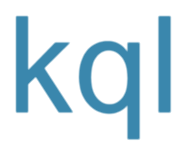

In [1]:
%reload_ext Kqlmagic

## Configuring some variables to facilitate the visualization <a class="anchor" id="3"></a>

In [2]:
%config Kqlmagic.auto_dataframe=False
%config Kqlmagic.auto_popup_schema=False
%config Kqlmagic.display_limit=10

## Loading other libraries for better visualization of results <a class="anchor" id="4"></a>

In [3]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = False

## Connecting to the Demo Log Analytics <a class="anchor" id="5"></a>

In [4]:
%kql loganalytics://workspace='DEMO_WORKSPACE';appkey='DEMO_KEY'

<h2 align='center'>===========================================================================<br>===========================================================================<br>HERE BEGINS KQL QUERIES EXTRACTED FROM THE WEBINAR</h2> <a class="anchor" id="6"></a>


## 'where' operator <a class="anchor" id="7"></a>

In [5]:
%kql SecurityEvent | where * contains "Kusto" | take 10

TenantId,TimeGenerated,SourceSystem,Account,AccountType,Computer,EventSourceName,Channel,Task,Level,EventData,EventID,Activity,SourceComputerId,EventOriginId,MG,TimeCollected,ManagementGroupName,AccessList,AccessMask,AccessReason,AccountDomain,AccountExpires,AccountName,AccountSessionIdentifier,AdditionalInfo,AdditionalInfo2,AllowedToDelegateTo,Attributes,AuditPolicyChanges,AuditsDiscarded,AuthenticationLevel,AuthenticationPackageName,AuthenticationProvider,AuthenticationServer,AuthenticationService,AuthenticationType,CACertificateHash,CalledStationID,CallerProcessId,CallerProcessName,CallingStationID,CAPublicKeyHash,CategoryId,CertificateDatabaseHash,ClassId,ClassName,ClientAddress,ClientIPAddress,ClientName,CommandLine,CompatibleIds,DCDNSName,DeviceDescription,DeviceId,DisplayName,Disposition,DomainBehaviorVersion,DomainName,DomainPolicyChanged,DomainSid,EAPType,ElevatedToken,ErrorCode,ExtendedQuarantineState,FailureReason,FileHash,FilePath,FilePathNoUser,Filter,ForceLogoff,Fqbn,FullyQualifiedSubjectMachineName,FullyQualifiedSubjectUserName,GroupMembership,HandleId,HardwareIds,HomeDirectory,HomePath,ImpersonationLevel,InterfaceUuid,IpAddress,IpPort,KeyLength,LmPackageName,LocationInformation,LockoutDuration,LockoutObservationWindow,LockoutThreshold,LoggingResult,LogonGuid,LogonHours,LogonID,LogonProcessName,LogonType,LogonTypeName,MachineAccountQuota,MachineInventory,MachineLogon,MandatoryLabel,MaxPasswordAge,MemberName,MemberSid,MinPasswordAge,MinPasswordLength,MixedDomainMode,NASIdentifier,NASIPv4Address,NASIPv6Address,NASPort,NASPortType,NetworkPolicyName,NewDate,NewMaxUsers,NewProcessId,NewProcessName,NewRemark,NewShareFlags,NewTime,NewUacValue,NewValue,NewValueType,ObjectName,ObjectServer,ObjectType,ObjectValueName,OemInformation,OldMaxUsers,OldRemark,OldShareFlags,OldUacValue,OldValue,OldValueType,OperationType,PackageName,ParentProcessName,PasswordHistoryLength,PasswordLastSet,PasswordProperties,PreviousDate,PreviousTime,PrimaryGroupId,PrivateKeyUsageCount,PrivilegeList,Process,ProcessId,ProcessName,Properties,ProfilePath,ProtocolSequence,ProxyPolicyName,QuarantineHelpURL,QuarantineSessionID,QuarantineSessionIdentifier,QuarantineState,QuarantineSystemHealthResult,RelativeTargetName,RemoteIpAddress,RemotePort,Requester,RequestId,RestrictedAdminMode,RowsDeleted,SamAccountName,ScriptPath,SecurityDescriptor,ServiceAccount,ServiceFileName,ServiceName,ServiceStartType,ServiceType,SessionName,ShareLocalPath,ShareName,SidHistory,Status,SubjectAccount,SubcategoryGuid,SubcategoryId,Subject,SubjectDomainName,SubjectKeyIdentifier,SubjectLogonId,SubjectMachineName,SubjectMachineSID,SubjectUserName,SubjectUserSid,SubStatus,TableId,TargetAccount,TargetDomainName,TargetInfo,TargetLinkedLogonId,TargetLogonGuid,TargetLogonId,TargetOutboundDomainName,TargetOutboundUserName,TargetServerName,TargetSid,TargetUser,TargetUserName,TargetUserSid,TemplateContent,TemplateDSObjectFQDN,TemplateInternalName,TemplateOID,TemplateSchemaVersion,TemplateVersion,TokenElevationType,TransmittedServices,UserAccountControl,UserParameters,UserPrincipalName,UserWorkstations,VirtualAccount,VendorIds,Workstation,WorkstationName,PartitionKey,RowKey,StorageAccount,AzureDeploymentID,AzureTableName,Type,_ResourceId


[]

In [7]:
%kql SecurityEvent| where TimeGenerated> ago(1d) | take 10 

TenantId,TimeGenerated,SourceSystem,Account,AccountType,Computer,EventSourceName,Channel,Task,Level,EventData,EventID,Activity,SourceComputerId,EventOriginId,MG,TimeCollected,ManagementGroupName,AccessList,AccessMask,AccessReason,AccountDomain,AccountExpires,AccountName,AccountSessionIdentifier,AdditionalInfo,AdditionalInfo2,AllowedToDelegateTo,Attributes,AuditPolicyChanges,AuditsDiscarded,AuthenticationLevel,AuthenticationPackageName,AuthenticationProvider,AuthenticationServer,AuthenticationService,AuthenticationType,CACertificateHash,CalledStationID,CallerProcessId,CallerProcessName,CallingStationID,CAPublicKeyHash,CategoryId,CertificateDatabaseHash,ClassId,ClassName,ClientAddress,ClientIPAddress,ClientName,CommandLine,CompatibleIds,DCDNSName,DeviceDescription,DeviceId,DisplayName,Disposition,DomainBehaviorVersion,DomainName,DomainPolicyChanged,DomainSid,EAPType,ElevatedToken,ErrorCode,ExtendedQuarantineState,FailureReason,FileHash,FilePath,FilePathNoUser,Filter,ForceLogoff,Fqbn,FullyQualifiedSubjectMachineName,FullyQualifiedSubjectUserName,GroupMembership,HandleId,HardwareIds,HomeDirectory,HomePath,ImpersonationLevel,InterfaceUuid,IpAddress,IpPort,KeyLength,LmPackageName,LocationInformation,LockoutDuration,LockoutObservationWindow,LockoutThreshold,LoggingResult,LogonGuid,LogonHours,LogonID,LogonProcessName,LogonType,LogonTypeName,MachineAccountQuota,MachineInventory,MachineLogon,MandatoryLabel,MaxPasswordAge,MemberName,MemberSid,MinPasswordAge,MinPasswordLength,MixedDomainMode,NASIdentifier,NASIPv4Address,NASIPv6Address,NASPort,NASPortType,NetworkPolicyName,NewDate,NewMaxUsers,NewProcessId,NewProcessName,NewRemark,NewShareFlags,NewTime,NewUacValue,NewValue,NewValueType,ObjectName,ObjectServer,ObjectType,ObjectValueName,OemInformation,OldMaxUsers,OldRemark,OldShareFlags,OldUacValue,OldValue,OldValueType,OperationType,PackageName,ParentProcessName,PasswordHistoryLength,PasswordLastSet,PasswordProperties,PreviousDate,PreviousTime,PrimaryGroupId,PrivateKeyUsageCount,PrivilegeList,Process,ProcessId,ProcessName,Properties,ProfilePath,ProtocolSequence,ProxyPolicyName,QuarantineHelpURL,QuarantineSessionID,QuarantineSessionIdentifier,QuarantineState,QuarantineSystemHealthResult,RelativeTargetName,RemoteIpAddress,RemotePort,Requester,RequestId,RestrictedAdminMode,RowsDeleted,SamAccountName,ScriptPath,SecurityDescriptor,ServiceAccount,ServiceFileName,ServiceName,ServiceStartType,ServiceType,SessionName,ShareLocalPath,ShareName,SidHistory,Status,SubjectAccount,SubcategoryGuid,SubcategoryId,Subject,SubjectDomainName,SubjectKeyIdentifier,SubjectLogonId,SubjectMachineName,SubjectMachineSID,SubjectUserName,SubjectUserSid,SubStatus,TableId,TargetAccount,TargetDomainName,TargetInfo,TargetLinkedLogonId,TargetLogonGuid,TargetLogonId,TargetOutboundDomainName,TargetOutboundUserName,TargetServerName,TargetSid,TargetUser,TargetUserName,TargetUserSid,TemplateContent,TemplateDSObjectFQDN,TemplateInternalName,TemplateOID,TemplateSchemaVersion,TemplateVersion,TokenElevationType,TransmittedServices,UserAccountControl,UserParameters,UserPrincipalName,UserWorkstations,VirtualAccount,VendorIds,Workstation,WorkstationName,PartitionKey,RowKey,StorageAccount,AzureDeploymentID,AzureTableName,Type,_ResourceId
81a662b5-8541-481b-977d-5d956616ac5e,2022-10-08 10:42:59.567670+00:00,OpsManager,NT AUTHORITY\SYSTEM,User,RETAILVM01,Microsoft-Windows-AppLocker,Microsoft-Windows-AppLocker/EXE and DLL,0,4,"<UserData xmlns=""http://schemas.microsoft.com/win/2004/08/events/event""> <RuleAndFileData xmlns=""http://schemas.microsoft.com/schemas/event/Microsoft.Windows/1.0.0.0""> <PolicyNameLength>3</PolicyNameLength> <PolicyName>EXE</PolicyName> <RuleId>{91C5D92D-8E35-43D5-9EE0-0D63579C2F4E}</RuleId> <RuleNameLength>24</RuleNameLength> <RuleName>(Default Rule) All Exe's</RuleName> <RuleSddlLength>48</RuleSddlLength> <RuleSddl>D:(XA;;FX;;;S-1-1-0;(APPID://PATH Contains ""*""))</RuleSddl> <TargetUser>S-1-5-18</TargetUser> <TargetProcessId>1112</TargetProcessId> <FilePathLength

[{'TenantId': '81a662b5-8541-481b-977d-5d956616ac5e', 'TimeGenerated': datetime.datetime(2022, 10, 8, 10, 42, 59, 567670, tzinfo=tzutc()), 'SourceSystem': 'OpsManager', 'Account': 'NT AUTHORITY\\SYSTEM', 'AccountType': 'User', 'Computer': 'RETAILVM01', 'EventSourceName': 'Microsoft-Windows-AppLocker', 'Channel': 'Microsoft-Windows-AppLocker/EXE and DLL', 'Task': 0, 'Level': '4', 'EventData': '<UserData xmlns="http://schemas.microsoft.com/win/2004/08/events/event">\r\n  <RuleAndFileData xmlns="http://schemas.microsoft.com/schemas/event/Microsoft.Windows/1.0.0.0">\r\n    <PolicyNameLength>3</PolicyNameLength>\r\n    <PolicyName>EXE</PolicyName>\r\n    <RuleId>{91C5D92D-8E35-43D5-9EE0-0D63579C2F4E}</RuleId>\r\n    <RuleNameLength>24</RuleNameLength>\r\n    <RuleName>(Default Rule) All Exe\'s</RuleName>\r\n    <RuleSddlLength>48</RuleSddlLength>\r\n    <RuleSddl>D:(XA;;FX;;;S-1-1-0;(APPID://PATH Contains "*"))</RuleSddl>\r\n    <TargetUser>S-1-5-18</TargetUser>\r\n    <TargetProcessId>1112</TargetProcessId>\r\n    <FilePathLength>82</FilePathLength>\r\n    <FilePath>%OSDRIVE%\\WINDOWSAZURE\\GUESTAGENT_2.7.41491.1057_2022-06-14_190349\\BFETOOLWIN8.EXE</FilePath>\r\n    <FileHashLength>32</FileHashLength>\r\n    <FileHash>11B1F0D1CD93B559E943399677EB355F86574FB7BC4F9382BDD9B35471E0D14B</FileHash>\r\n    <FqbnLength>103</FqbnLength>\r\n    <Fqbn>O=MICROSOFT CORPORATION, L=REDMOND, S=WASHINGTON, C=US\\MICROSOFT® COREXT\\BFETOOLWIN8.EXE\\2.7.41491.1057</Fqbn>\r\n    <TargetLogonId>0x3e7</TargetLogonId>\r\n  </RuleAndFileData>\r\n</UserData>', 'EventID': 8002, 'Activity': '8002 - A process was allowed to run.', 'SourceComputerId': '53282486-7d1d-4c97-b542-5aa3047c3dcd', 'EventOriginId': '5334e63a-b90e-47b2-92cd-cce2c46d23f5', 'MG': '00000000-0000-0000-0000-000000000001', 'TimeCollected': datetime.datetime(2022, 10, 8, 10, 43, 30, 987067, tzinfo=tzutc()), 'ManagementGroupName': 'AOI-81a662b5-8541-481b-977d-5d956616ac5e', 'AccessList': '', 'AccessMask': '', 'AccessReason': '', 'AccountDomain': '', 'AccountExpires': '', 'AccountName': '', 'AccountSessionIdentifier': '', 'AdditionalInfo': '', 'AdditionalInfo2': '', 'AllowedToDelegateTo': '', 'Attributes': '', 'AuditPolicyChanges': '', 'AuditsDiscarded': None, 'AuthenticationLevel': None, 'AuthenticationPackageName': '', 'AuthenticationProvider': '', 'AuthenticationServer': '', 'AuthenticationService': None, 'AuthenticationType': '', 'CACertificateHash': '', 'CalledStationID': '', 'CallerProcessId': '', 'CallerProcessName': '', 'CallingStationID': '', 'CAPublicKeyHash': '', 'CategoryId': '', 'CertificateDatabaseHash': '', 'ClassId': '', 'ClassName': '', 'ClientAddress': '', 'ClientIPAddress': '', 'ClientName': '', 'CommandLine': '', 'CompatibleIds': '', 'DCDNSName': '', 'DeviceDescription': '', 'DeviceId': '', 'DisplayName': '', 'Disposition': '', 'DomainBehaviorVersion': '', 'DomainName': '', 'DomainPolicyChanged': '', 'DomainSid': '', 'EAPType': '', 'ElevatedToken': '', 'ErrorCode': None, 'ExtendedQuarantineState': '', 'FailureReason': '', 'FileHash': '11B1F0D1CD93B559E943399677EB355F86574FB7BC4F9382BDD9B35471E0D14B', 'FilePath': '%OSDRIVE%\\WINDOWSAZURE\\GUESTAGENT_2.7.41491.1057_2022-06-14_190349\\BFETOOLWIN8.EXE', 'FilePathNoUser': '', 'Filter': '', 'ForceLogoff': '', 'Fqbn': 'O=MICROSOFT CORPORATION, L=REDMOND, S=WASHINGTON, C=US\\MICROSOFT® COREXT\\BFETOOLWIN8.EXE\\2.7.41491.1057', 'FullyQualifiedSubjectMachineName': '', 'FullyQualifiedSubjectUserName': '', 'GroupMembership': '', 'HandleId': '', 'HardwareIds': '', 'HomeDirectory': '', 'HomePath': '', 'ImpersonationLevel': '', 'InterfaceUuid': '', 'IpAddress': '', 'IpPort': '', 'KeyLength': None, 'LmPackageName': '', 'LocationInformation': '', 'LockoutDuration': '', 'LockoutObservationWindow': '', 'LockoutThreshold': '', 'LoggingResult': '', 'LogonGuid': '', 'LogonHours': '', 'LogonID': '', 'LogonProcessName': '', 'LogonType': None, 'LogonTypeName': '', 'MachineAccountQuota': '', 'MachineInventory': '', 'MachineLogon': '', 'MandatoryLa

In [ ]:
%kql SecurityEvent| where TimeGenerated> ago(1h) and EventID== 4624

In [ ]:
%kql SecurityEvent| where TimeGenerated > ago(1h)| where EventID == 4624| where AccountType =~ "user"

In [ ]:
%kql SecurityEvent | where EventID in (4624, 4625)

In [ ]:
%kql VMConnection | where ipv4_is_match (DestinationIp, "10.0.0.0/8")

## 'search' operator <a class="anchor" id="8"></a>

In [ ]:
%kql search "10.1.5.5"

In [ ]:
%kql SecurityEvent | where TimeGenerated >= ago(1d) | search "Guest"

## 'extend' operator <a class="anchor" id="9"></a>

In [ ]:
%kql SecurityEvent | extend ComputerNameLength = strlen(Computer)

In [ ]:
%%kql Perf
|where CounterName == "Free Megabytes"
|where InstanceName == "C:"
|extend FreeKB = CounterValue * 1000
|extend FreeGB = CounterValue / 1000

In [ ]:
%%kql SecurityEvent
| where EventID in ( 4624 , 4625 )
| extend rgroup = extract("resourcegroups/(.*)/providers",1,_ResourceId)

In [ ]:
%%kql SecurityEvent
| where EventID in ( 4624 , 4625 )
| extend rgroup = split(_ResourceId,"/",4)[0]

In [ ]:
%%kql SecurityEvent
| where EventID in ( 4624 , 4625 )
| parse _ResourceId with "/subscription/" sub "/resourcegroups/" rgroup "/providers" *

## A real-world example: TOR usage detection <a class="anchor" id="10"></a>
from: https://github.com/Azure/Azure-Sentinel/blob/master/Detections/Syslog/squid_tor_proxies.yaml

In [ ]:
%%kql 
let timeframe = 1d;
let DomainList = dynamic(["tor2web.org", "tor2web.com", "torlink.co", "onion.to", "onion.ink", "onion.cab", "onion.nu", "onion.link", 
  "onion.it", "onion.city", "onion.direct", "onion.top", "onion.casa", "onion.plus", "onion.rip", "onion.dog", "tor2web.fi", 
  "tor2web.blutmagie.de", "onion.sh", "onion.lu", "onion.pet", "t2w.pw", "tor2web.ae.org", "tor2web.io", "tor2web.xyz", "onion.lt", 
  "s1.tor-gateways.de", "s2.tor-gateways.de", "s3.tor-gateways.de", "s4.tor-gateways.de", "s5.tor-gateways.de", "hiddenservice.net"]); 
//
Syslog
| where TimeGenerated >= ago(timeframe)
| where ProcessName contains "squid" 
| extend HTTP_Status_Code = extract("(TCP_(([A-Z]+)(_[A-Z]+)*)|UDP_(([A-Z]+)(_[A-Z]+)*))/([0-9]{3})",8,SyslogMessage),Domain = extract("(([A-Z]+ [a-z]{4,5}:\\/\\/)|[A-Z]+ )([^ :\\/]*)",3,SyslogMessage)
| where HTTP_Status_Code == "200"
| where Domain contains "."
| where Domain has_any (DomainList)

## Lab #1: Filtering <a class="anchor" id="11"></a>
Find all Windows logon events starting 2 weeks ago until 1 week ago that occured on a computer with name which starts with "C".

In [ ]:
%%kql 
SecurityEvent
| where TimeGenerated between (ago(14d) .. ago(7d))
| where EventID == 4624 //"An account was successfully logged on" more info at https://www.ultimatewindowssecurity.com/securitylog/encyclopedia/event.aspx?eventID=4624
| where Computer startswith "C"

## 'summarize' command <a class="anchor" id="12"></a>

In [ ]:
%kql SecurityEvent | summarize count() by Computer

In [ ]:
%%kql
WindowsFirewall
| where CommunicationDirection == "SEND" 
| where FirewallAction == "ALLOW"
| summarize dcount(SourceIP)

In [ ]:
%%kql
SecurityEvent
| where TimeGenerated > ago(1h)
| where EventID == 4624
| summarize count() by AccountType, Computer

## Lab #2: analysis <a class="anchor" id="13"></a>
Find how many times each process ran per computer. Hints and guideline: (1) Event 4688 logs process creation; (2) which field represent the processes created and which the computer on which it was ran?

In [ ]:
%%kql
SecurityEvent
| where EventID == 4688 //"A new process has been created"
| summarize count() by NewProcessName, Computer

## Variants and add-ons to summarize <a class="anchor" id="14"></a>

In [ ]:
%kql SecurityEvent | distinct Computer, Account

In [ ]:
%kql SecurityEvent | where EventID == 4624 | count

In [ ]:
%kql SecurityEvent | where EventID == 4624 | order by Account

In [ ]:
%kql SecurityEvent | top 10 by TimeGenerated desc

## 'order by' exercise <a class="anchor" id="15"></a>

In [ ]:
%%kql
SecurityAlert
| where TimeGenerated > ago(7d) 
| extend severityOrder = case (
    AlertSeverity == "High", 3, 
    AlertSeverity == "Medium", 2, 
    AlertSeverity == "Low", 1, 
    AlertSeverity == "Informational", 0, 
    -1)
| order by severityOrder
| project-away severityOrder

## 'summarize' as filter: arg_min(), arg_max() <a class="anchor" id="16"></a>

In [ ]:
%%kql
WindowsFirewall
| where TimeGenerated > ago(7d)
| summarize arg_max(TimeGenerated, *) by SourceIP

## Quiz #1 <a class="anchor" id="17"></a>

What is the difference between the following queries?

```
 SecurityEvent
| summarize arg_max(TimeGenerated, *) by Account 
| where EventID == "4624"
| count
```
and 
```
SecurityEvent
| where EventID == "4624"
| summarize arg_max(TimeGenerated, *) by Account 
| count
```
 

In [ ]:
%%kql SecurityEvent
| summarize arg_max(TimeGenerated, *) by Account 
| where EventID == "4624"
| count

In [ ]:
%%kql SecurityEvent
| where EventID == "4624"
| summarize arg_max(TimeGenerated, *) by Account 
| count

**ANSWER:** The line 2 filters the last TimeGenerated per Account and then from the remaining lines it tries to get only the event 4624. The problem is that not all last operation of each account was the 4624. The second kql query gets the last time that an Account was associated to EventID 4624.

## Lab #3: analysis <a class="anchor" id="18"></a>
Find how source IPs from which traffic has been dropped on Windows machines more than 10 times in the last 7 days.

Hints and guideline:
- Connections to Windows machines are collected in the "WindowsFirewall"
- What is the name of the field which specifies traffic direction and can help determine inbound connections?
- What is the name of the field which specifies the firewall action and can help identify dropped connections?

In [ ]:
%%kql WindowsFirewall
|where TimeGenerated >= ago(7d)
|where CommunicationDirection == 'RECEIVE'
|where FirewallAction == 'DROP'
|summarize c=count() by SourceIP
|where c>=10 

## A real-world example: password spray detection <a class="anchor" id="19"></a>
from: https://github.com/Azure/Azure-Sentinel/blob/master/Detections/SigninLogs/DisabledAccountSigninsAcrossManyApplications.yaml

In [ ]:
%%kql 
let timeframe = 1d;
let threshold = 3;
SigninLogs
| where TimeGenerated >= ago(timeframe) 
| where ResultType == "50057"
| where ResultDescription =~ "User account is disabled. The account has been disabled by an administrator."
| summarize applicationCount = dcount(AppDisplayName) by UserPrincipalName, IPAddress
| where applicationCount >= threshold

# Prepare

## 'project' operator <a class="anchor" id="20"></a>

In [ ]:
%kql SecurityEvent | project TimeGenerated, Computer

In [ ]:
%kql SecurityEvent | project IsImportant = iff(Computer contains "CEO", true, false)

## 'summarize' to prepare: make_list(), make_set() <a class="anchor" id="21"></a>

In [ ]:
%kql SecurityEvent | summarize make_set(Account) by Computer

# Visualize

## 'summarize': bin and time series <a class="anchor" id="22"></a>

In [ ]:
%%kql SecurityEvent
|summarize count() by bin(TimeGenerated, 1h)
|render timechart

In [ ]:
%%kql SecurityEvent 
| where TimeGenerated > ago(7d) 
| summarize count() by bin(TimeGenerated, 1d)
| render timechart

In [ ]:
%%kql VMConnection
| summarize count() by SourceIp 
| sort by count_ desc 
| render barchart

## Lab #4: visualization <a class="anchor" id="23"></a>

Chart the rate of process creation on all domain controllers.

Hints and guideline:
- Process creation is Windows event 4688
- Domain controller names start with "DC"
- Create multiple charts by aggregating additional more than one field

In [ ]:
%%kql SecurityEvent
| where Computer startswith "DC"
| where EventID == "4688"
| summarize count() by Computer, bin(TimeGenerated, 1h) 
| render timechart

## Unrelated 'countif' operator example <a class="anchor" id="24"></a>

In [ ]:
%%kql 
SecurityEvent 
| summarize AdminSuccessfullLogons = countif(Account contains "Admin" and EventID == 4624), 
            AdminFailedLogons = countif(Account contains "Admin" and EventID == 4625)

## Lab #5: visualization <a class="anchor" id="25"></a>

Render graph of successful vs failed logons over the last 7days, use alias for the legend ("Success", "Failed")

Hints and guideline:
- In the Security Event table, successful logon has eventid 4624, and failed logon event id 4625.
- Check if aggregation function countif can help.

In [ ]:
%%kql
SecurityEvent 
| summarize Success=countif(EventID == 4624), 
            Failed=countif(EventID == 4625) by bin(TimeGenerated, 1h)
| render timechart

# Advanced Topics

## 'let' statement: declare and reuse variables <a class="anchor" id="26"></a>

In [ ]:
%%kql 
let timeOffset = 7d;
let discardEventId = 4688;
SecurityEvent
| where TimeGenerated > ago(timeOffset*2) and TimeGenerated < ago(timeOffset) 
| where EventID != discardEventId

## 'let' statement: declare dynamic tables or lists <a class="anchor" id="27"></a>

In [ ]:
%%kql
let suspiciousAccounts = datatable(account: string) [ 
    @"\administrator",
    @"NT AUTHORITY\SYSTEM"];
SecurityEvent 
| where Account in (suspiciousAccounts) 

In [ ]:
%%kql
let LowActivityAccounts = SecurityEvent
|summarize cnt = count() by Account
| where cnt <10;
//
LowActivityAccounts
| where Account contains "Mal"

## 'materialize' statement <a class="anchor" id="28"></a>

In [ ]:
%%kql
let LowActivityAccounts = materialize(SecurityEvent
                                        | summarize cnt = count() by Account | where cnt < 10);
LowActivityAccounts
| where Account contains "Mal"
| union (LowActivityAccounts | where Account contains "Rep")

## 'union' operator <a class="anchor" id="29"></a>

In [ ]:
%%kql
SecurityEvent
| union (WindowsFirewall | where CommunicationDirection == "RECEIVE")

## Lab #6: union <a class="anchor" id="30"></a>
Find the ratio of alerts (in the SecurityAlert table) to events (in the SecurityEvent table) broken by day for the last week

In [ ]:
%%kql
SecurityAlert 
| union SecurityEvent 
| summarize SecurityAlerts = countif(Type == "SecurityAlert"), 
            SecurityEvents = countif(Type == "SecurityEvent") by bin (TimeGenerated, 24h)
| extend Ratio = SecurityAlerts * 1.0 / SecurityEvents 
| project SecurityEvents , SecurityAlerts , Ratio

## 'join' operator <a class="anchor" id="31"></a>

In [ ]:
%%kql
SecurityEvent
|join (SecurityAlert | where AlertSeverity == 'High'| extend Account = tostring(parse_json(ExtendedProperties).["User Name"])
) on Account

## JSON exercise <a class="anchor" id="32"></a>

In [ ]:
%%kql
SecurityAlert
| extend ExtendedProperties = todynamic(ExtendedProperties) 
| extend ActionTaken = ExtendedProperties.ActionTaken
| extend AttackerIP = ExtendedProperties["Attacker IP"]

In [ ]:
%%kql 
SecurityAlert
| mv-expand entity = todynamic(Entities)

In [ ]:
%%kql
SecurityAlert
| mv-apply entity = todynamic(Entities) on (
    where entity.Type == "account"
    | extend account = strcat (entity.NTDomain, "\\", entity.Name))

## Lab #7 <a class="anchor" id="33"></a>
Show for each account that has alerts, how many alerts and which Security Event types it had in the last 7 days.

Hints and guideline:
- Alerts in the SecurityAlert table keeps entities in a JSON array string. What is the name of this field?
- Account is just one of the possible entity types in the array
- Make sure that account has the same format in both the alerts and events table.

In [ ]:
%%kql
SecurityAlert
| mv-apply entity=todynamic(Entities) on (
    where entity.Type == "account"
    | extend Account = strcat(entity.NTDomain, "\\", entity.Name))
| summarize dcount(SystemAlertId) by Account
| join kind=leftouter ( SecurityEvent
| summarize make_set(EventID) by Account ) on Account